In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('heart.csv')
data['Cholesterol'] = data['Cholesterol'].replace(['0', 0], np.nan)
data.shape
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


## Correlations

0.05875823535807307


<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

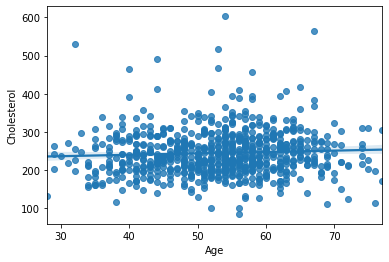

In [2]:
print(data['Age'].corr(data['Cholesterol']))
sns.regplot(x=data["Age"], y=data["Cholesterol"])

0.2543993561515447


<AxesSubplot:xlabel='Age', ylabel='RestingBP'>

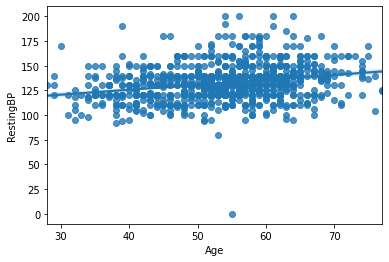

In [3]:
print(data['Age'].corr(data["RestingBP"]))
sns.regplot(x=data["Age"], y=data["RestingBP"])

-0.3820446750319705


<AxesSubplot:xlabel='Age', ylabel='MaxHR'>

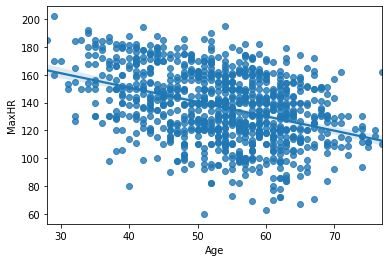

In [4]:
print(data['Age'].corr(data['MaxHR']))
sns.regplot(x=data['Age'], y=data['MaxHR'])

0.25861153601875625


<AxesSubplot:xlabel='Age', ylabel='Oldpeak'>

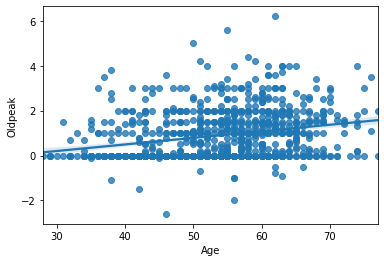

In [5]:
print(data['Age'].corr(data['Oldpeak']))
sns.regplot(x=data['Age'], y=data['Oldpeak'])

0.05875823535807307

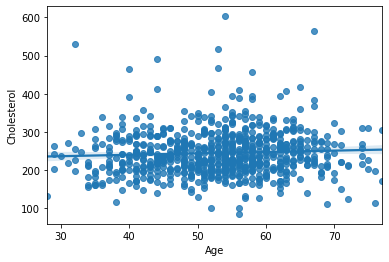

In [6]:
sns.regplot(x=data["Age"], y=data["Cholesterol"])
data['Age'].corr(data['Cholesterol'])

-0.3820446750319705

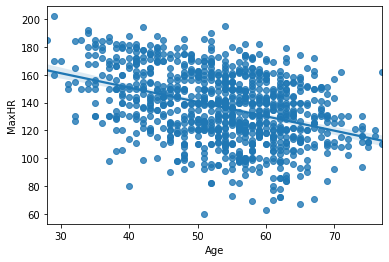

In [7]:
sns.regplot(x=data["Age"], y=data["MaxHR"])
data['Age'].corr(data["MaxHR"])

## Chest pain type and heart disease

<AxesSubplot:xlabel='ChestPainType'>

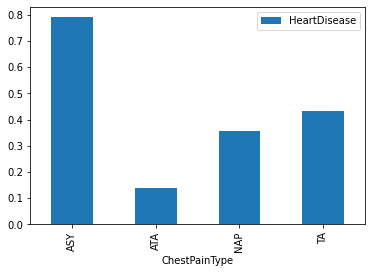

In [8]:
#people divided into four groups according to "ChestPainType"
chest_asy = data[data['ChestPainType'] == 'ASY']
chest_ata = data[data['ChestPainType'] == 'ATA']
chest_nap = data[data['ChestPainType'] == 'NAP']
chest_ta = data[data['ChestPainType'] == 'TA']

#proportion of people with heart disease in "ChestPainType" groups
asy_HD = chest_asy.HeartDisease.value_counts()[1]/chest_asy.Age.count()
ata_HD = chest_ata.HeartDisease.value_counts()[1]/chest_ata.Age.count()
nap_HD = chest_nap.HeartDisease.value_counts()[1]/chest_nap.Age.count()
ta_HD = chest_ta.HeartDisease.value_counts()[1]/chest_ta.Age.count()

#proportions into data frame
chest = pd.DataFrame({'ChestPainType': ["ASY", "ATA", "NAP", "TA"],
                   'HeartDisease': [asy_HD, ata_HD, nap_HD, ta_HD]})

chest.plot(x='ChestPainType', y=None, kind ='bar')



In [9]:
print(data.Oldpeak.max())
print(data.Oldpeak.min())

6.2
-2.6


# Goal 2. Finding features associations with heart disease using Aprior algorithm

## Changing data from numeric to categoric

In [28]:
#copy of data ro be maiputated
data_2 = data.copy(deep=True)

# "Cholesterol" change to groups: Chol_Good < 200; Chol_Borderline 200 <= and >= 239; Chol_High > 239 
for i in range(len(data_2)):
    if data_2.loc[i, "Cholesterol"] < 200:
        data_2.loc[i, "Cholesterol"] = 'Chol_Good'
    elif data_2.loc[i, "Cholesterol"] >= 200 and data_2.loc[i, "Cholesterol"] < 240:
        data_2.loc[i, "Cholesterol"] = 'Chol_Borderline'
    else:
        data_2.loc[i, "Cholesterol"] = 'Chol_High'

# "RestingBP" to groups: R_BP_Normal < 120; R_BP_Elevated 120-129; R_BP_High1 130-139; High2 140-180; R_BP_Danger > 180 
    if data_2.loc[i, "RestingBP"] < 120:
        data_2.loc[i, "RestingBP"] = 'R_BP_Normal'
    elif data_2.loc[i, "RestingBP"] >= 120 and data_2.loc[i, "RestingBP"] < 130:
        data_2.loc[i, "RestingBP"] = 'R_BP_Elevated'
    elif data_2.loc[i, "RestingBP"] >= 130 and data_2.loc[i, "RestingBP"] < 140:
        data_2.loc[i, "RestingBP"] = 'R_BP_High1'
    elif data_2.loc[i, "RestingBP"] >= 140 and data_2.loc[i, "RestingBP"] <= 180:
        data_2.loc[i, "RestingBP"] = 'R_BP_High2' 
    else:
        data_2.loc[i, "RestingBP"] = 'R_BP_Danger'
        
# "FastingBS 0 - Normal, 1 - High 
    if data_2.loc[i, "FastingBS"] == 0:
        data_2.loc[i, "FastingBS"] = 'F_BS_Normal'
    else:
        data_2.loc[i, "FastingBS"] = 'F_BS_High'

# "Oldpeak 0 - OP_Normal; < 0 - OP_Under; > 0; OP_Over 
    if data_2.loc[i, "Oldpeak"] == 0:
        data_2.loc[i, "Oldpeak"] = 'OP_Normal'
    elif data_2.loc[i, "Oldpeak"] < 0:
        data_2.loc[i, "Oldpeak"] = 'OP_Under'
    else:
        data_2.loc[i, "Oldpeak"] = 'OP_Over'      

# "HeartDisease 0 - HD_No, 1 - HD_Yes
    if data_2.loc[i, "HeartDisease"] == 0:
        data_2.loc[i, "HeartDisease"] = 'HD_No'
    else:
        data_2.loc[i, "HeartDisease"] = 'HD_Yes'

# "adds info in front of feature values to understand it better later        
    data_2.loc[i, 'RestingECG'] = 'ECG_'+ data_2.loc[i, 'RestingECG']
    data_2.loc[i, 'ExerciseAngina'] = 'EXA_'+ data_2.loc[i, 'ExerciseAngina'] 

    
        
# data_3 is without age and MaxHR. 
data_3 = data_2.drop(['Age','MaxHR'], 1) 
data_3

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,M,ATA,R_BP_High2,Chol_High,F_BS_Normal,ECG_Normal,EXA_N,OP_Normal,Up,HD_No
1,F,NAP,R_BP_High2,Chol_Good,F_BS_Normal,ECG_Normal,EXA_N,OP_Over,Flat,HD_Yes
2,M,ATA,R_BP_High1,Chol_High,F_BS_Normal,ECG_ST,EXA_N,OP_Normal,Up,HD_No
3,F,ASY,R_BP_High1,Chol_Borderline,F_BS_Normal,ECG_Normal,EXA_Y,OP_Over,Flat,HD_Yes
4,M,NAP,R_BP_High2,Chol_Good,F_BS_Normal,ECG_Normal,EXA_N,OP_Normal,Up,HD_No
...,...,...,...,...,...,...,...,...,...,...
913,M,TA,R_BP_Normal,Chol_High,F_BS_Normal,ECG_Normal,EXA_N,OP_Over,Flat,HD_Yes
914,M,ASY,R_BP_High2,Chol_Good,F_BS_High,ECG_Normal,EXA_N,OP_Over,Flat,HD_Yes
915,M,ASY,R_BP_High1,Chol_Good,F_BS_Normal,ECG_Normal,EXA_Y,OP_Over,Flat,HD_Yes
916,F,ATA,R_BP_High1,Chol_Borderline,F_BS_Normal,ECG_LVH,EXA_N,OP_Normal,Flat,HD_Yes


In [29]:
#data_3 data frame converted to two dimensianal array named "transactions" for using it with Apriori algorithm later 
transactions = data_3.values
transactions[0:3]

array([['M', 'ATA', 'R_BP_High2', 'Chol_High', 'F_BS_Normal',
        'ECG_Normal', 'EXA_N', 'OP_Normal', 'Up', 'HD_No'],
       ['F', 'NAP', 'R_BP_High2', 'Chol_Good', 'F_BS_Normal',
        'ECG_Normal', 'EXA_N', 'OP_Over', 'Flat', 'HD_Yes'],
       ['M', 'ATA', 'R_BP_High1', 'Chol_High', 'F_BS_Normal', 'ECG_ST',
        'EXA_N', 'OP_Normal', 'Up', 'HD_No']], dtype=object)

In [30]:
from mlxtend.preprocessing import TransactionEncoder

#one hot encoding data as true or false so Apriori algorithm can use it
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,ASY,ATA,Chol_Borderline,Chol_Good,Chol_High,Down,ECG_LVH,ECG_Normal,ECG_ST,EXA_N,...,OP_Normal,OP_Over,OP_Under,R_BP_Danger,R_BP_Elevated,R_BP_High1,R_BP_High2,R_BP_Normal,TA,Up
0,False,True,False,False,True,False,False,True,False,True,...,True,False,False,False,False,False,True,False,False,True
1,False,False,False,True,False,False,False,True,False,True,...,False,True,False,False,False,False,True,False,False,False
2,False,True,False,False,True,False,False,False,True,True,...,True,False,False,False,False,True,False,False,False,True
3,True,False,True,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False,True,False,True,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,True,False,False,True,False,True,...,False,True,False,False,False,False,False,True,True,False
914,True,False,False,True,False,False,False,True,False,True,...,False,True,False,False,False,False,True,False,False,False
915,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
916,False,True,True,False,False,False,True,False,False,True,...,True,False,False,False,False,True,False,False,False,False


In [34]:
from mlxtend.frequent_patterns import apriori

freq_itemsets = apriori(df, min_support=5/len(df), use_colnames=True)  #use_colnames shows the names of items
freq_itemsets

,support,itemsets
0,0.540305,(ASY)
1,0.188453,(ATA)
2,0.258170,(Chol_Borderline)
3,0.159041,(Chol_Good)
4,0.582789,(Chol_High)
...,...,...
39982,0.006536,"(Up, F, HD_No, ECG_Normal, EXA_N, Chol_High, A..."
39983,0.008715,"(Up, HD_No, ECG_Normal, EXA_N, Chol_High, M, A..."
39984,0.010893,"(R_BP_High2, Up, HD_No, ECG_Normal, EXA_N, Cho..."
39985,0.005447,"(Up, NAP, Chol_Good, HD_No, ECG_Normal, EXA_N,..."


In [38]:
from mlxtend.frequent_patterns import association_rules

freq_itemsets = apriori(df, min_support=5/len(df), use_colnames=True)
association_rules(freq_itemsets,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
157,(M),(F_BS_Normal),0.789760,0.766885,0.584967,0.740690,0.965842,-0.020688,0.898983
156,(F_BS_Normal),(M),0.766885,0.789760,0.584967,0.762784,0.965842,-0.020688,0.886280
185,(HD_Yes),(M),0.553377,0.789760,0.498911,0.901575,1.141580,0.061876,2.136035
186,(M),(HD_Yes),0.789760,0.553377,0.498911,0.631724,1.141580,0.061876,1.212741
196,(M),(OP_Over),0.789760,0.584967,0.481481,0.609655,1.042204,0.019497,1.063246
...,...,...,...,...,...,...,...,...,...
281660,"(EXA_N, Chol_High, R_BP_High1, M, ATA, F_BS_No...","(OP_Over, HD_No)",0.010893,0.176471,0.005447,0.500000,2.833333,0.003524,1.647059
281661,"(EXA_N, Chol_High, R_BP_High1, OP_Over, ATA, F...","(M, HD_No)",0.009804,0.290850,0.005447,0.555556,1.910112,0.002595,1.595588
281662,"(EXA_N, R_BP_High1, M, OP_Over, ATA, F_BS_Normal)","(Chol_High, HD_No)",0.008715,0.209150,0.005447,0.625000,2.988281,0.003624,2.108932
281663,"(R_BP_High1, Chol_High, M, OP_Over, ATA, F_BS_...","(EXA_N, HD_No)",0.005447,0.386710,0.005447,1.000000,2.585915,0.003340,inf
